alias of mapper 11001010: 202
rulestring of rule 110: 01110110


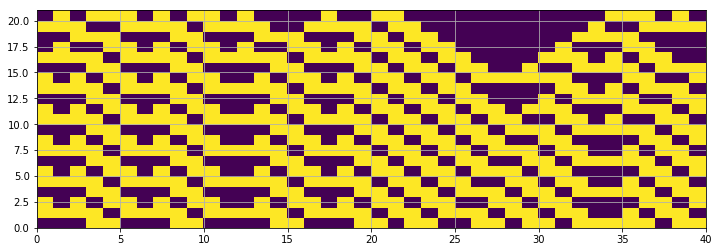

In [376]:
from KBs import *
class kb_2dntca():
    def __init__(self):
        self.familyname='2dntca'
        pass
    def rulestr2alias(self, rulestr):
        '''
        Convert a 26-digit hexadecimal rulestring to a B/S alias
        '''
        OUT = ''
        # rulestr =  '000000000060031c61c67f86a0'
        r=hex2bin(rulestr,102);
        r=r[::-1];
        rule=[i for i,x in enumerate(r) if x=='1'];
#         print r
        lst = [hensellist[i] for i in rule]
        lst.sort()
        
        #### group by B/S
        d = collections.OrderedDict((('b',{}),('s',{}))) ### set default
#         d = {'b':{},'s':{}}   ### set default
        d.update(
            {k:list(gp) for k,gp in itertools.groupby(lst, lambda x:x[0])}        
        )
        for k,lst in d.items():
            d[k] = {k:list(gp) for k,gp in itertools.groupby(lst, lambda x:x[1])}
            
        for bs, dd in d.items():
            OUT += bs
            for k,lst in dd.items():
                OUT += k + ''.join( conf[-1] for conf in lst)
        OUT = OUT.replace('_','')
        alias = OUT
        return alias


    def alias2rulestr(self,alias): 
        '''
        Convert a B/S alias to a 26-digit hexadecimal rulestring
        '''
    # alias.replace('-','')
        alias = re.sub('(\d-[a-zA-Z]+)',lambda o:invert(o.group()),alias)
        alias = p_NOTnumletter.sub( '', alias).lower()
        OUT = ['0']*102
        d = collections.OrderedDict((('b',{}),('s',{}))) ### set default
        # d.update()
        # alias.split('s')
        s = alias
        lst = [x for x  in re.split("([bs])", s) if x]
        if len(lst) % 2: #### Padding to even length
            lst += ['']
        d  = dict(ntuple(lst,2))
        idxs = []
        for k, v in d.items():
            s = v
            lst = [x for x in re.split("(\d)", s) if x]
            L  = len(lst)
            v_old = ''
            for i,v in enumerate(lst):
                if v.isdigit():
                    if v_old.isdigit():
                        idx = [henselidx.get( k + v_old + c,None) for c in subconf]
                        idxs.extend(idx)
                    if i + 1 == L:
                        idx = [henselidx.get( k + v + c,None) for c in subconf]
                        idxs.extend(idx)
                    num = v
                else:
                    idx = [henselidx[ k + num + v_i]  for v_i in v ]
                    idxs.extend(idx)
                v_old = v
        idxs = [ x for x in idxs if x is not None] 
        for i in idxs:
            if not i is None:
                OUT[i] = '1'
        bitstr=''.join(OUT[::-1]);
        hexstr=hex(int(bitstr,2)).lstrip('0x').rstrip('L').zfill(26)
        return hexstr
    def rulestr2adv(self,rulestr):
        ruleprj=np.array( 
            list(hex2bin(rulestr,102)[::-1]),
            np.int);
        adv = self.bin2adv(ruleprj)
#         ruleprj=np.array(list(hex2bin(rulestr,102)[::-1]));
#         fir=(2**np.arange(0,9)).reshape([1,3,3]);
#         pj=rca2ntca;
#         def adv(a,horizon):
#             return ruleprj[pj[convolve_int(a,fir,'wrap').astype(np.int)]]
#         # adv=lambda a, horizon: ruleprj[pj[convolve_int(a,fir,'wrap').astype(np.int)]]
        return adv 
    def conv(self,IN):
        '''
        Convovle using non-totalistic isotropic filter
        '''
        fir=(2**np.arange(0,9)).reshape([1,3,3]);
        pj=rca2ntca;
        return pj[convolve_int(IN,fir,'wrap').astype(np.int)]
    def bin2adv(self, ruleprj):
        if isinstance(ruleprj,str):
            ruleprj = list(ruleprj)
        ruleprj = np.array(ruleprj,np.int)
        def adv(a,horizon=0):
            return ruleprj[self.conv(a)]
        return adv
    def rstr(self,callback=(lambda x:bin2hex(x).zfill(26)) ):
        r = '{:0102b}'.format(random.randrange(2**102))
        if callback is not None:
            r = callback(r)
        return r
    def randadv(self):
        return self.bin2adv(self.rstr(None))
    def bulk_rstr(self,seed = 0,bsize=2**18,**kwargs):
        random.seed(seed)
        lst = [{'family':self.familyname,
                'rulestr':self.rstr(**kwargs)} for x in range(bsize)]
        return lst    
class kb_eca():
    def conv(self,IN,method):
        '''
        Convolve using 1D universal (non-totalistic non-isotropic) filter
        '''
        fir = (2**np.arange(3)).reshape([1,3,1])
        return convolve_int(IN,fir,method)
    def rstr(self,):
        pass
    def bin2adv(self,rulebin,method='wrap'):
        if isinstance(rulebin,str):
            rulebin = list(rulebin)
        rulebin = np.array(rulebin,np.int)
        def adv(a,horizon=0,method=method):
            return rulebin[self.conv(a,method=method)]
        return adv
    def rulestr2alias(self,rstr):
        assert len(rstr)==8
        alias = int(rstr,2)
        return str(alias)
    def alias2rulestr(self,alias):
        rstr = base2bin(alias,10,8)[::-1]
        return rstr
    def rulestr2adv(self,rstr):
        return self.bin2adv(rstr)
        
def sample(self,ini=None,adv = None,T = None):
    '''
    Sample an iterator ('CA_sys' object)
    '''
    if T is None:
        T = self.hmax
    if adv is None:
        adv = self.adv
    if ini is None:
        ini=self.rdf().astype(int)
    avc = ini
    hist = np.zeros((T+1,)+avc.shape,dtype=np.int)
    for i in range(T+1):
        hist[i]=avc
        avc=(adv(avc)) 
    return hist
def showsptime(arr,ax=None,**kwargs):
    if ax is None:
        fig,ax = plt.subplots(1,1,figsize=[12,4])
    
    return ax.pcolormesh(sflatten(arr),**kwargs)
kb  = kb_eca()
rstr = '11001010'
alias = kb.rulestr2alias(rstr)
print 'alias of mapper %s:'%rstr,alias
print 'rulestring of rule 110:',kb.alias2rulestr('110')

random.seed(0)
np.random.seed(30)
env = CA_sys()
env.family= kb_eca()
env.alias = '110'
env.alias = '118'
env.alias2rulestr()
env.change_size((1,100,40**2))
hist = sample(env,T=20)
# hist.shape
out = np.take(hist,0,axis=-1)
showsptime(out[::-1])
# print out
# showsptime(out)
plt.grid()
plt.show()

In [2]:
# import os
# import re
# def DIR2lasti(DIR,pattern='seed(\d+)_size600'):
#     dlst = os.listdir(DIR)
#     dlst = ''.join(dlst)
#     it = re.findall(pattern,dlst)
#     lasti = max(map(int,it))
#     return lasti
# DIR = 'data_pdist/'
# DIR2lasti(DIR)

# import numpy as np
# fs = os.listdir(DIR)
# out = sum((np.load(os.path.join(DIR,f)).tolist()  for f in fs),[])


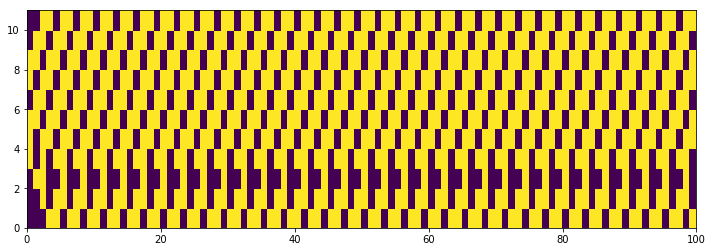

In [2]:
glider = '00011101100'
ini = np.reshape(map(int,glider),(1,-1,1))
out = sample(env,ini=ini,)
showsptime(np.squeeze(out).T)
plt.show()

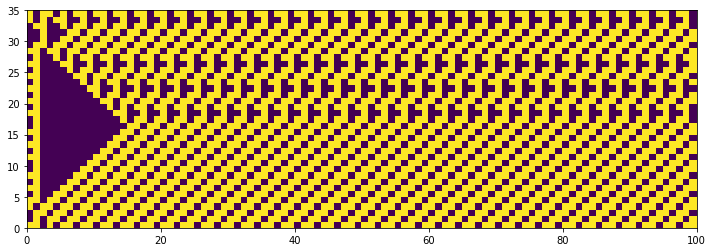

In [3]:
glider = '10011010100101010010101010101000011'
ini = np.reshape(map(int,glider),(1,-1,1))
out = sample(env,ini=ini,)
showsptime(np.squeeze(out).T)
plt.show()

In [397]:
print cmp(0,1)

-1


In [405]:

def get_parent_shape(avc,t):
    spdim = avc.shape[1:]
    pardim = list(x+t*2 for x in spdim)
    if spdim[-1] == 1:
        pardim[-1] = 1
#     pardim =tuple(x+t*2 if x!=1 else x for x in spdim)
    return tuple(pardim)

def findparent(avc,env,t=1,method='brute'):
    pardim = get_parent_shape(avc,t)
    nbit = np.prod(pardim)
    parent = itertools.product(*[range(2)]*nbit)
#     print len(list(parent))
    parent = np.reshape(list(parent),(2**nbit,)+pardim)
#     print parent.shape
    
    out = sample(env, ini = parent,T = t)
    bot = out[-1]
    
    realdim = [i for i,x in enumerate(bot.shape) if x!=1 and i!=0]
    for ax in realdim:
        bot= np.take(bot,range(t,bot.shape[ax]-t),axis=ax)
    res  = bot[:,None]
    targ = avc[None]
    graph = np.all(res == targ,axis=(-1,-2))
    return parent,graph

def glider2num(glider):
    ini = np.reshape(map(int,glider),(1,-1,1))
    fir = np.reshape(2**np.arange(ini.size),(1,-1,1))
    ini_int = convolve_int(ini,fir,'reflect').flat[(ini.size-1)//2]
    return ini_int

def main(glider,particle=None,per = 2,T=5,silent=1,findall=0):
    outlst = []
    if particle is None:
        particle = glider2num(glider)
    ini = np.reshape(map(int,glider),(1,-1,1))
    fir = np.reshape(2**np.arange(ini.size),(1,-1,1))
#     fir = np.reshape(2**np.arange(ini.size),(1,-1,1))
#     ini_int = convolve_int(ini,fir,'reflect').flat[(ini.size-1)//2]

    out = sample(env,ini=ini,)
#     showsptime(np.squeeze(out).T)
#     plt.show()

#     T = 7
    out = -.1*np.ones( get_parent_shape(ini,T) + (1+T,),dtype=np.float)
    # raise Exception()
    for t in range(0,T+1):
        if t ==0:
            parent = ini
            paridx = 0
        else:
            parent,paridx = findparent(ini,env,t = t)
        validPar = parent[np.ravel(paridx)]
        recur = convolve_int(validPar,fir,'wrap') == particle

        if per:
            move = cmp(per,0)*(t//abs(per))
#             print move
        else:
            move = 0
#         driftidx=  t + move + (parent[0].size-1)//2
        driftidx=  t + move + (+ini.size-1)//2
        obsidx = recur[:, driftidx]    
        if not silent:
            print recur.shape
            print np.shape(obsidx)
            print obsidx.mean()
        if findall:
            outlst.append(validPar)
        else:
            outlst.append(validPar[obsidx.ravel()])
        row = np.mean(recur,axis=0)
        idx = range(T-t,T-t+len(row))
    #     out
    #     print row.shape
        if t==0:
            row = ini
        out[idx,:,t] = row
    #     break
    if not silent:
        showsptime(out.T)
        plt.show()
    res = outlst
#     print [np.shape(x) for x in res]
    tiles = [ {'parity':{'T':T,'per':per},
       'seq':tuple(sum(x,[]) ),} for x in np.array(res[T]).tolist()]        
    return tiles
#     return outlst
per  = 2
n = 5
lst = [base2bin(str(x),10,n) for x in range(2**n)]
# glider = '110011'
glider = '01110'
# if 1:
silent = 1
# for glider in lst:
# res = map(lambda x:main(x,per=1,T=4,silent=0),lst);
print 'Done'

Done


In [ ]:
%time


In [84]:
%time
n = 5
lst = [base2bin(str(x),10,n) for x in range(2**n)]
res = map(lambda x:main(x,per=0,T=3),lst);

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


In [85]:
res

[[{'parity': {'T': 3, 'per': 0}, 'seq': (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)}],
 [{'parity': {'T': 3, 'per': 0}, 'seq': (0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0)},
  {'parity': {'T': 3, 'per': 0}, 'seq': (0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1)},
  {'parity': {'T': 3, 'per': 0}, 'seq': (0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1)},
  {'parity': {'T': 3, 'per': 0}, 'seq': (0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0)},
  {'parity': {'T': 3, 'per': 0}, 'seq': (0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1)},
  {'parity': {'T': 3, 'per': 0}, 'seq': (0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1)},
  {'parity': {'T': 3, 'per': 0}, 'seq': (1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0)},
  {'parity': {'T': 3, 'per': 0}, 'seq': (1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1)},
  {'parity': {'T': 3, 'per': 0}, 'seq': (1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1)},
  {'parity': {'T': 3, 'per': 0}, 'seq': (1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0)},
  {'parity': {'T': 3, 'per': 0}, 'seq': (1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1)},
  {'parity': {'T': 3, 'per': 0}, 'seq': (1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1)}],
 [],
 [{'p

In [88]:
%%time
####################################################################
####################################################################
####################################################################
#########oooo|oooo|xxx|cccc|oooo####################################
####################################################################
####################################################################
#########oooo|xxxc|ccc|oooo|oooo####################################
####################################################################
####################################################################
####################################################################
####################################################################
## source oooo->xxxx
## sink   cccc->oooo
## find paths from sources to sinks


# main(per=1,T=3)


import simpleCycles
### Look for a period 2 glider, drift 1 on a period 2 backgd
### common product is 6


Tbk = 3
tile0 = par2tiles(T=Tbk,per=0,n=1)

tile = tile0
curr = pre2curr(tile)
cks=simpleCycles.simple_cycles(adj2dct(tile2adj(tile0)))
# cks = list(cks)
cks = filter(lambda (i,x):len(x)==3,enumerate(cks))
# print 
print cks

ck = cks[0]
i,idx = ck
bkd = sum([curr[x] for x in idx],())
# tile
# print cks[0]
### 

### find period 2 static tiling
### at T=6 

p2T6tile = par2tiles(T=6,per=0,n=2)


[(47224, [22, 88, 80])]
CPU times: user 1.79 s, sys: 0 ns, total: 1.79 s
Wall time: 1.78 s


In [226]:
# %%time
Tb = 6
T = Tb
per = 2
dft = Tb/per
Lb = len(bkd)
print dft
print query
print len(query)
print 2*T
# bkdper = Tb / Tbk
# query = iter_head(itertools.cycle(bkd[::-1]),Tb)[::-1] + list(bkd) + iter_head(itertools.cycle(bkd),dft)


tile0 = main(glider=bkd,T=2*3,per=0)
curr = pre2curr(tile0)
tile0 = tile_flatten(tile0)
query = iter_head(itertools.cycle(bkd),Tb)
tile0Right = filter(lambda seq: tuple(seq[-Tb:])== tuple(query),tile0)

tileAll = tile_flatten(main(glider=bkd,T=2*3,per=0))
# print tile_flatten(tile0)[:5]

#### Do the right part first
#### Specify tail of the pattern

tile = tileAll[:]
print 'LEN,',len(tile)
for nper in range(1000):
    print nper
    L = T + nper*Lb
    if L > 2*T+Lb:
        break    
#         pass
    if nper:
        amat = tile2adj(tile_last,tile0Right,overlap=2*T)
        idx=  np.transpose(np.where(amat))
        tile = [tile_last[x]+bkd for x,y in idx]
    else:
        query = iter_head(itertools.cycle(bkd),L)
        f = lambda seq: tuple(seq[-L:]) == tuple(query)
        tile = filter(f,tile)    
    tile_last = tile
    
tileRight = tile_last
query = iter_head(itertools.cycle(bkd[::-1]),Tb)[::-1]
tile0Left = filter(lambda seq: tuple(seq[2:2+Tb])== tuple(query),tile0)


3
[0, 1, 1, 0, 1, 1]
6
12
LEN, 2816
0
1
2
3
4


In [455]:
query = iter_head(itertools.cycle(bkd[::-1]),Tb+Lb)[::-1]
tile = filter(lambda seq: tuple(seq[2:2+(Tb+Lb)])== tuple(query),tile0)
amat = tile2adj(tile)
# tile0Left = np.take(tile ,(amat.any(axis=1)),axis = 0)
# tile0Left = np.take(tile ,(amat.any(axis=1)),axis = 0)
# print query
tile0Left = np.array(tile)[amat.any(axis=1)]
tile0Left

# amat.any(axis=1)

array([[6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0],
       [6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
       [6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0],
       [6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
       [6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]])

In [621]:
tile0 = main(glider=bkd,T=2*3,per=0,findall=1)
curr = pre2curr(tile0)
tile0 = tile_flatten(tile0)

query = iter_head(itertools.cycle(bkd),Tb+Lb)
# print Tb,Lb
tile = filter(lambda seq: tuple(seq[-(Tb+Lb):])== tuple(query),tile0)
amat = tile2adj(tile)
tile0Right = np.array(tile)[amat.any(axis=1)]

query = iter_head(itertools.cycle(bkd[::-1]),Tb+Lb)[::-1]
tile = filter(lambda seq: tuple(seq[2:2+(Tb+Lb)])== tuple(query),tile0)
amat = tile2adj(tile)
tile0Left = np.array(tile)[amat.any(axis=0)]
# tile0Left = np.take(tile ,(amat.any(axis=0)),axis = 0)

query = iter_head(itertools.cycle(bkd),Tb)
tile = filter(lambda seq: tuple(seq[-(Tb):])== tuple(query),tile0)
amat = tile2adj(tile,tile0Right)
print amat.shape
tile = np.array(tile)[amat.any(axis=1)]
tile[:,1]=2
tile = tile.tolist()
tile = [x for x,_ in filter(lambda (x,y): tuple(x[2+Tb:-Tb])!=tuple(y),zip(tile,pre2curr(tile)))]
tileRight = tile

tileLeft = tile0Left

print len(tile0)
print len(tile0Right)
print len(tile0Left)
print len(tileRight)


(176, 64)
6933
64
44
112


In [506]:
printmat(tile)
print 
printmat(tileRight)
print 
printmat(tile0Right)

6,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1
6,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1
6,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1
6,0,0,0,0,0,0,1,0,1,1,0,1,1,0,1,1
6,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1
6,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,1
6,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1
6,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,1
6,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,1
6,0,0,0,0,0,1,1,0,1,1,0,1,1,0,1,1
6,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,1
6,0,0,0,0,1,0,0,0,1,1,0,1,1,0,1,1
6,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,1
6,0,0,0,0,1,0,0,1,1,1,0,1,1,0,1,1
6,0,0,0,0,1,0,1,0,1,1,0,1,1,0,1,1
6,0,0,0,0,1,0,1,1,1,0,0,1,1,0,1,1
6,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,1
6,0,0,0,0,1,1,0,0,1,1,0,1,1,0,1,1
6,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,1
6,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1
6,0,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1
6,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1
6,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,1
6,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,1
6,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1
6,0,0,0,1,0,0,1,0,1,1,0,1,1,0,1,1
6,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1
6,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1
6,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,1
6,0,0,0,1,0,1,

In [653]:
def list2set(lst):
    return {tuple(x) for x in lst}
# A = list2set(tileLeft)
A=  list2set(tileRight)
B=  list2set(tileG)
print len(A)
print len(B)
A.update(B)
print len(A)

112
4300
4300


In [647]:
tile = tileLeft
print len(tile)
print len(set(tuple(x) for x in tile))

44
44


In [256]:
!pip install python-igraph --user

    100% |████████████████████████████████| 378kB 1.7MB/s ta 0:00:01
  Running setup.py bdist_wheel for python-igraph ... done
  Stored in directory: /home/shouldsee/.cache/pip/wheels/2b/9b/50/34d9d2b8f74c7a1c70f6337686d66f8fc8bbab6d2f196fe6ef
Successfully built python-igraph
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [276]:
from igraph import Graph

# g = Graph.Lattice([10, 10], circular=False)
# g.get_all_shortest_paths(0)

def find_all_paths(graph, start, end):
    '''
    Source:https://stackoverflow.com/questions/2606018/path-between-two-nodes    
    '''
    def find_all_paths_aux(adjlist, start, end, path):
        path = path + [start]
        if start == end:
            return [path]
        paths = []
        for node in adjlist[start] - set(path):
            paths.extend(find_all_paths_aux(adjlist, node, end, path))
        return paths
    adjlist = [set(graph.neighbors(node)) for node in xrange(graph.vcount())]
    return find_all_paths_aux(adjlist, start, end, [])
# find

[[0]]

In [660]:
# tileG = tile_flatten(par2tiles(n=Lb,T=Tb,per=2))
tile = tile_flatten(par2tiles(n=Lb,T=Tb,per=2))
tile = [x for x,_ in filter(lambda (x,y): tuple(x[2+Tb:-Tb])!=tuple(y),zip(tile,pre2curr(tile)))]
tileG = tile
print len(tile)


4300


In [666]:
# tile = tile0Right
# pre2curr(tileRight)
# [x[2+Tb:-Tb] for x in tile]

In [658]:

zip(tile,pre2curr(tile),[x[2+Tb:-Tb] for x in tile])

[((6, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0), (1, 0, 1)),
 ((6, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0), (0, 0, 1)),
 ((6, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0), (0, 0, 1)),
 ((6, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0), (1, 0, 1)),
 ((6, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0), (0, 0, 1)),
 ((6, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0), (0, 0, 1)),
 ((6, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0), (1, 0, 1)),
 ((6, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0), (0, 0, 1)),
 ((6, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0), (0, 0, 1)),
 ((6, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0), (1, 0, 1)),
 ((6, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0), (0, 0, 1)),
 ((6, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0), (0, 0, 1)),
 ((6, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0)

In [718]:

tile = sum([ x.tolist() if not isinstance(x,list) else x  for x in 
            [tileLeft,tileRight,tileG]] ,
          [])
curr = pre2curr(tile,mid=1)

heads  = [x[2:2+2*T] for x in tile]
tails  = [x[-2*T:] for x in tile]
amat = np.array(tails)[:,None] == np.array(heads)[None,:]
print amat.shape
amat = np.all( amat,axis=-1)
# x.tolist()  for x in [tileLeft,tileRight,tileG]
# tile = np.vstack([tileLeft , tileRight , tileG])
# amat = tile2adj(tile)
g = Graph.Adjacency(amat.tolist())


# find_all_paths(g,0,1)
tLidx = range(len(tileLeft))
tRidx = range(len(tileLeft),len(tileLeft)+len(tileRight))
lst = []
res = map(lambda L: g.get_shortest_paths(L,tRidx),tLidx)
# for L,R in itertools.product(tLidx,tRidx):
#     p = g.get_shortest_paths(L,R)
#     lst += [p]
# print len(tileLeft)
# print len(tileLeft)+len(tileRight)


(4456, 4456, 12)


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Couldn't reach some vertices at structural_properties.c:740
  """


In [709]:
print curr[1564]
printmat(sample(env,ini=np.reshape(tile[1564][2:],(1,-1,1)),T=6).squeeze())


(0, 0, 1)
0,0,0,0,0,1,0,0,1,1,0,0,1,1,0
0,0,0,0,1,1,1,1,0,1,1,1,0,1,1
1,0,0,1,0,0,0,1,1,0,0,1,1,0,1
1,1,1,1,1,0,1,0,1,1,1,0,1,1,0
0,0,0,0,1,1,1,1,0,0,1,1,0,1,1
1,0,0,1,0,0,0,1,1,1,0,1,1,0,1
1,1,1,1,1,0,1,0,0,1,1,0,1,1,0


[0, 1, 1]

[23, 23, 23, 25, 2294, 3309, 4219, 126, 0, 0]
0,1,1,0,1,1,0,1,1,0,1,1,0,1,1
0,1,1,0,1,1,0,1,1,0,1,1,0,1,1
0,1,1,0,1,1,0,1,1,0,1,1,0,1,1
0,1,1,0,1,1,0,1,1,0,1,1,1,0,1
0,1,1,0,1,1,0,1,1,1,0,1,1,1,0
0,1,1,0,1,1,1,0,1,1,1,0,1,1,1
0,1,1,1,0,1,1,1,0,1,1,1,0,1,1
1,0,1,1,1,0,1,1,1,0,1,1,0,1,1
0,1,1,0,1,1,0,1,1,0,0,0,0,0,0
0,1,1,0,1,1,0,1,1,0,0,0,0,0,0
[[0, 1, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1], (0, 1, 1), (1, 0, 1), (1, 1, 0), [1, 1, 1], [0, 1, 1], [0, 1, 1]]
[ 21  22  23  26  44  49  50  51  54  68  77  78  82 100]
(101, 1, 30, 1)


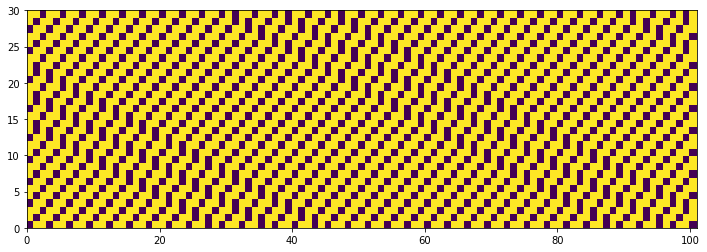

In [734]:
out = [ x for x in res if sum( len(y) for y in x) !=0]
# out = [ x for x in out[0] if x]
out = out[1]
per = [x[1] for x in tile]
per_gb =  [sum(per[i] for i in x) for x in out]

# print per_gb
i = 82
ck = out[i]
ck = ck[0:1]*2 + ck + [0]*2
print ck 
printmat([tile[x][2:]for x in ck])
print [curr[x] for x in ck]
# print per_gb
print np.where(np.array(per_gb)>0)[0]
show_cycle( ck,curr)
# out[0]


In [402]:
tileG = tile_flatten(par2tiles(n=Lb,T=Tb,per=0))
print len(tileG)

13795


In [411]:
# print(len(tileG))
cu = pre2curr(tileG)
i = 1000
print tileG[i],cu[i]

(6, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1) (0, 1, 1)


In [428]:
# tileG
tile = tileG
q = (6,2,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1)
res = filter(lambda x:tuple(x)==q,tile)
print res

[(6, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1)]


In [459]:
tileLeft

array([[6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0],
       [6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
       [6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0],
       [6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
       [6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]])

In [507]:
tile  = tileLeft.tolist()
q = (6,0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,1,)
print (len(q))
# print q in tileL
res = filter(lambda x:tuple(x)==q,tile)
print res


17
[[6, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]]


In [525]:
# [ x for x in res if sum( for y in x)]

# res[6]
# []

In [ ]:
curr = pre2curr

In [528]:
# [x for x in out


[[0, 608, 321, 112],
 [0, 608, 321, 113],
 [0, 608, 321, 114],
 [0, 608, 321, 115],
 [0, 608, 322, 116],
 [0, 162, 117],
 [0, 607, 123],
 [0, 607, 124],
 [0, 607, 125],
 [0, 607, 126],
 [0, 610, 127],
 [0, 614, 128],
 [0, 2065, 129],
 [0, 2068, 130],
 [0, 2062, 131],
 [0, 2591, 132],
 [0, 2591, 133],
 [0, 2591, 134],
 [0, 2591, 135],
 [0, 2594, 136],
 [0, 2598, 137],
 [0, 3934, 138],
 [0, 3934, 139],
 [0, 3934, 140],
 [0, 3937, 141],
 [0, 3941, 142],
 [0, 5679, 143],
 [0, 5679, 144],
 [0, 5679, 145],
 [0, 5679, 146],
 [0, 5682, 147],
 [0, 159],
 [0, 160],
 [0, 161],
 [0, 162],
 [0, 162, 117, 163],
 [0, 162, 117, 164],
 [0, 162, 117, 165],
 [0, 162, 117, 166],
 [0, 162, 117, 167],
 [0, 162, 117, 168],
 [0, 162, 117, 169],
 [0, 162, 117, 170],
 [0, 607, 124, 175],
 [0, 607, 124, 176],
 [0, 607, 124, 177],
 [0, 607, 124, 178],
 [0, 607, 124, 179],
 [0, 607, 124, 180],
 [0, 607, 124, 181],
 [0, 607, 124, 182],
 [0, 607, 124, 183],
 [0, 607, 124, 184],
 [0, 607, 125, 185],
 [0, 607, 125, 18

In [493]:
# tileRight.shape
# import pymi
from pymisca.util import *
def printmat(mat,sep=','):
    if isinstance(mat,np.ndarray):
        mat=  mat.tolist()
    printlines([sep.join(str(y) for y in x) for x in mat])
printmat(tile0Right)
# print mat2str(tileRight)

6,0,0,0,0,0,1,1,0,1,1,0,1,1,0,1,1
6,0,0,0,1,0,1,1,0,1,1,0,1,1,0,1,1
6,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,1
6,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1
6,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1,1
6,0,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1
6,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,1
6,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1


In [508]:
tile  = tileRight.tolist()
# q = (6,2,1,1,0,1,1,0,1,1,1,0,1,1,0,1,1)
q = '60110110111011011'
q = map(int,q)
q = tuple(q)
print q
print len(q)
# print q
# print q in tileRight
res = filter(lambda x:tuple(x)==q,tile)
# cu = pre2curr(tileRight)
# print np.array(res)
print res


(6, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1)
17
[[6, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1]]


In [346]:
res

[[[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  

In [329]:
curr = map(tuple,curr)

In [331]:
??show_cycle

In [333]:
ck = res[0]
ini = np.reshape([curr[x] for x in ck],(1,-1,1))
# show_cycle(res[0],curr)

[[[(0, 1, 1)]
  [(0,)]
  [(0, 1, 1)]]]


In [344]:
# ?g.get_all_shortest_paths
res = g.get_shortest_paths(tLidx[2],tRidx)
print res

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Couldn't reach some vertices at structural_properties.c:740
  


In [257]:
### Look for a period 2 glider, drift 1/per on a period 2 backgd
### common product is 6
# tileG  + tileLeft


In [183]:
# def merge(tile0,tile1,right=1):
#     #### tile0 always on the left
# #     if not right:
# #         tmp = tile1[:]
# #         tile1 = tile0
# #         tile0 = tmp
#     if right:
#         if isinstance(tile1[0],dict):
#             tile1 = tile_flatten(tile1)
#         amat =  tile2adj(tile0,tile1,overlap=len(tile1[0])-2)
#     return amat
# amat = merge(tile0,[[None,None]+tail])
# idx=  np.where(amat)[0]

# res.sum()

In [125]:
%%time
Tb = 6
per = 2
dft = Tb/per
print dft
print query
print len(query)
print 2*Tb
# bkdper = Tb / Tbk
query = iter_head(itertools.cycle(bkd[::-1]),Tb)[::-1] + list(bkd) + iter_head(itertools.cycle(bkd),dft)
tile0 = main(glider=bkd,T=2*3,per=0)
tile_ref = [[None,None,] + query] 
amat = tile2adj(tile_ref,tile0,overlap=len(query))
idx =  np.where(amat)[0].ravel()
tile = [tile0[x] for x in idx]
excitable = tile
f = map(tile_flatten,tile)
print np.array(f)


query = iter_head(itertools.cycle(bkd),Tb+len(bkd))
tile_ref = [[None,None,] + query] 
amat = tile2adj(tile0,tile_ref,overlap=len(query))
idx =  np.where(amat)[0].ravel()
print idx
tile = [tile0[x] for x in idx]
refractable = tile
f = map(tile_flatten,tile)
print np.array(f)
# tile1

3
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
12
12
[[6 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0]
 [6 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1]
 [6 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0]
 [6 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1]
 [6 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0]
 [6 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1]
 [6 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0]
 [6 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1]]
[  23   67  111  155  199  243  287  331  375  419  463  507  551  595
  639  683  727  771  815  859  903  947  991 1035 1079 1123 1167 1211
 1255 1299 1343 1387 1431 1475 1519 1563 1607 1651 1695 1739 1783 1827
 1871 1915 1959 2003 2047 2091 2135 2179 2223 2267 2311 2355 2399 2443
 2487 2531 2575 2619 2663 2707 2751 2795]
[[6 0 0 ... 0 1 1]
 [6 0 0 ... 0 1 1]
 [6 0 0 ... 0 1 1]
 ...
 [6 0 1 ... 0 1 1]
 [6 0 1 ... 0 1 1]
 [6 0 1 ... 0 1 1]]
CPU times: user 220 ms, sys: 0 ns, total: 220 ms
Wall time: 215 ms


(97, 97)
CPU times: user 60 ms, sys: 0 ns, total: 60 ms
Wall time: 59.3 ms


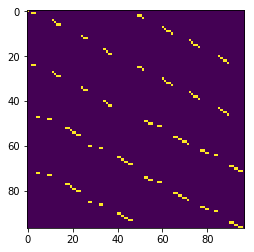

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 732 µs


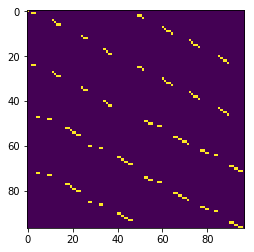

In [705]:

# n = 1

from simpleCycles import simple_cycles
def adj2dct(adj):
    idx = np.where(adj)
    g = {x:[] for x in range(len(adj))}
    for I,O in np.transpose(idx):
        g[I] = g.get(I,[]) + [O]
    return g


def tile_flatten(x):
    def f(x):
        return (x['parity']['T'],x['parity']['per'],) + tuple(x['seq'])
    if isinstance(x,list):
        return map(f,x)
    else:
        return f(x)
#     tiles = [ (x['parity']['T'],x['partiy']['per'],) + tuple(x['seq']) for x in tdct]
#     return tiles
def par2tiles(T,per,n=1,flat=0):
#     T = 3
#     per =  2
    lst = [base2bin(str(x),10,n) for x in range(2**n)]
#     res = map(lambda x:main(x,per=per,T=T),lst);
    tiles = map(lambda x:main(x,per=per,T=T),lst);
    # tiles = np.vstack([x[T] for x in res])
    tiles = sum(tiles,[])
#     tiles = [ {'parity':{'T':T,'per':per},
#        'seq':tuple(x),} for x in np.squeeze(np.vstack(x[T] for x in res)).tolist()]
    if flat:
        tiles = map(tile_flatten,tiles)
#     tiles = [ (T,per,) + tuple(x) for x in np.squeeze(np.vstack(x[T] for x in res)).tolist()]
    return tiles 
# tile0 = par2tiles(2,0)


def safe_divide(T,per):
    if per:
        return T/per
    else:
        return 0


def isCompatible(left,right,T = 1,n =  1):
#     lPar =left.get('parity')
#     rPar =right.get('parity')    
    
    #### Currently assuming the T are the same    
    
    ##### Assuming both are of per 0
    #### Tail of left matches Head of right
#     tail = left['seq'][-2*lPar['T']:]
#     head = right['seq'][:2*rPar['T']]
    lper = left[1] 
    rper = right[1]
    ldri = safe_divide(T,lper)
    rdri = safe_divide(T,rper)
    jumplen = ldri - rdri
    assert 2*T-jumplen>=0,'Negative overlap due to huge jump'
        
#     tail = left [-(2*T-jumplen)  :     ]     ### len = 2*T - jumplen
#     head = right[2  : 2 + (2*T- jumplen)] ### len = 2*T - jummplen
    tail = left [2+n:   ]     ### len = 2*T - n
    head = right[2  : -n]        ### len = 2*T - n
    tailtail = tail[jumplen:]
    headhead = head[:-jumplen] if jumplen>0 else head
    if all(x==y for x,y in zip(headhead,tailtail)):
        consent =  headhead
        if  jumplen>0:
            jumphist = np.hstack([tail[:jumplen],head])
#             jumphist = tuple(tail[:jumplen]) + tuple(head)
            end = sample(env, ini =np.reshape(jumphist,(1,-1,1)),T=T)[-1]
            end = end.ravel()[T:-T]
            print jumphist,end
            return 0.5
        else:
    #         print head,tail
            return True
    else:
        return False

def tile2adj(tleft,tright=None,sep=0,overlap=None):
    if isinstance(tleft[0],dict):
        tleft = map(tile_flatten,tleft)
    if tright is None:
        tright = tleft        
    elif isinstance(tright[0],dict):
        tright = map(tile_flatten,tright)

    if overlap is None:
        T = tleft[0][0]
        overlap = 2*T - sep
    tleft = np.array(tleft)[:,2:]
    tright = np.array(tright)[:,2:]
    #### construct DAG from tiles
    heads = tright[:,:(overlap)]
    tails = tleft[:,-(overlap):]
#     mids  = tiles[:,T:-T]
    ##### tail of the left is the head of the right
    ##### axis= 0 is left, axis=1 is right
    adj = tails[:,None] == heads[None,:]
    adj = np.all(adj,axis=2).squeeze()
    return adj

N = 1000
def iter_head(cks,N):
    i = 0
    lst = []
    for x in cks:
        i+=1
        lst+=[x]
        if i==N:
            break
    return lst
def pre2curr(pre,mid=0):
    if isinstance(pre[0],dict):
        pre = map(tile_flatten,pre)
    out = []    
    for x in pre:
#         T = x[]
        T,per = x[:2]
        move = 0 if (per==0) | mid else  cmp(per,0)*(T//abs(per))
        out.append(x[2+T+move:-T+move])
    return out
#     print pre[:5]
# pre2curr(tile0)
def show_cycle(ck,curr,callback = np.transpose,**kwargs):
#     print ck
    ini = np.reshape([curr[x] for x in ck],(1,-1,1))
    out = sample(env,ini=ini,**kwargs)
    print np.shape(out)
    showsptime(callback(out.squeeze()))
    plt.show()

    
import scipy.spatial.distance as spdist
# spdist.pdist(np.array(tile0),isCompatible)
# ?spdist.cdist
def f1():
#     X = np.array(tile0)
    X = map(tile_flatten,tile0)
    D = spdist.cdist(X,X,isCompatible)
    print D.shape
    return D


tile0 = par2tiles(3,0)
tile1 = par2tiles(3,3)

%time D1 = f1()
plt.imshow(D1)
plt.show()

%time D2 = tile2adj(map(tile_flatten,tile0))
plt.imshow(D2)
plt.show()
assert np.all(D1==D2),'Result disagree'

# def f2():
# #     X = np.array(tile0)
# #     X = tile0
#     D = spdist.cdist(tile1,tile0,isCompatible)
#     print D.shape
#     return D
# print len(tile0[0])
# %time f2()
# {x['seq'] for x in tile1} - {x['seq'] for x in tile0}
# tile1

In [833]:
D = tile2adj(tile1)

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True, False]])

In [842]:
tile = tile1 + tile0
D = tile2adj(tile)
curr = pre2curr(tile)

cks = simple_cycles(adj2dct(D))
cks = iter_head(cks,1000)
# cks = list(cks)
# print len(cks)

# print cks_ptn.shape

In [ ]:
tile

In [850]:
seqs = [ [curr[x] for x in ck] for ck in cks]
dft_local  =[ tuple(tile[x]['parity']['per'] for x in ck) for ck in cks] 
dft_gb = [sum(x) for x in dft_local]

(0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0)
(21, 1, 56, 1)


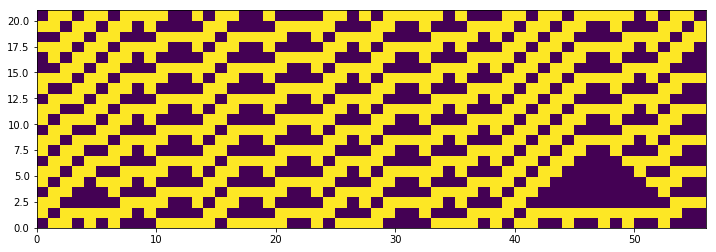

In [861]:
# showsptime(sample(env,ini=seqs[0]))
# print 
i = 0
print dft_local[i]
show_cycle(cks[i],curr,callback=identity,T=20)

Tiles shape: (57, 7, 1)
(57, 57, 6, 1)
(57, 57)


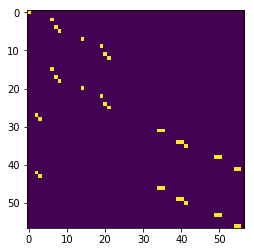

1
[0]
CPU times: user 196 ms, sys: 144 ms, total: 340 ms
Wall time: 166 ms


In [688]:
%%time
### Get the list of valid tiles
n = 1
T = 3
per =  2
lst = [base2bin(str(x),10,n) for x in range(2**n)]
res = map(lambda x:main(x,per=per,T=T),lst);
tiles = np.vstack([x[T] for x in res])
print 'Tiles shape:',tiles.shape


#### construct DAG from tiles
heads = tiles[:,:2*T]
tails = tiles[:,-2*T:]
mids  = tiles[:,T:-T]
##### tail of the left is the head of the right
##### axis= 0 is left, axis=1 is right
adj = tails[:,None] == heads[None,:]
print adj.shape
adj = np.all(adj,axis=2).squeeze()
print adj.shape
# print adj.shape
plt.imshow(adj[:,:])
# plt.imshow()
plt.show()
idx = np.where(np.diag(adj))[0]
# print tails.shape

G = adj2dct(adj)
cks = list(simple_cycles(G))
print len(cks)
print cks[0]

In [667]:
TILES = {tuple(np.ravel(mids[x]).tolist()) for x in cks}
# set(TILES)


In [622]:
cks = simple_cycles(G)
lst = []

i = 0
for x in cks:
#     print x
    lst += [x]
    i+=1
    if i==100:
        break
cks = lst

In [648]:
G = adj2dct(adj)
cks = list(simple_cycles(G))
print len(cks)

# mids[cks[0]]
print 'T=',T
# print cks
ck = cks[0]
print ck
print np.hstack([heads[ck[1:]],tails[ck][:-1]]).squeeze()
print tiles[ck].squeeze()
print mids[ck].squeeze()

47260
T= 3
[2, 50, 55, 23, 89, 84, 71, 95, 93, 45, 87, 78, 19, 37, 73, 10, 64, 83, 70, 92, 44, 86, 32, 63, 79, 20, 85, 28, 12, 26, 51, 58, 69, 91, 42, 36, 72, 4, 11, 24]
[[0 0 0 1 1 0 0 0 0 1 1 0]
 [0 0 1 1 0 1 0 0 1 1 0 1]
 [0 1 1 0 1 1 0 1 1 0 1 1]
 [1 1 0 1 1 1 1 1 0 1 1 1]
 [1 0 1 1 1 1 1 0 1 1 1 1]
 [0 1 1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1 1 0]
 [1 1 1 1 0 1 1 1 1 1 0 1]
 [1 1 1 0 1 1 1 1 1 0 1 1]
 [1 1 0 1 1 0 1 1 0 1 1 0]
 [1 0 1 1 0 0 1 0 1 1 0 0]
 [0 1 1 0 0 1 0 1 1 0 0 1]
 [1 1 0 0 1 0 1 1 0 0 1 0]
 [1 0 0 1 0 1 1 0 0 1 0 1]
 [0 0 1 0 1 1 0 0 1 0 1 1]
 [0 1 0 1 1 1 0 1 0 1 1 1]
 [1 0 1 1 1 1 1 0 1 1 1 1]
 [0 1 1 1 1 0 0 1 1 1 1 0]
 [1 1 1 1 0 1 1 1 1 1 0 1]
 [1 1 1 0 1 0 1 1 1 0 1 0]
 [1 1 0 1 0 1 1 1 0 1 0 1]
 [1 0 1 0 1 1 1 0 1 0 1 1]
 [0 1 0 1 1 0 0 1 0 1 1 0]
 [1 0 1 1 0 1 1 0 1 1 0 1]
 [0 1 1 0 1 0 0 1 1 0 1 0]
 [1 1 0 1 0 0 1 1 0 1 0 0]
 [1 0 1 0 0 0 1 0 1 0 0 0]
 [0 1 0 0 0 1 0 1 0 0 0 1]
 [1 0 0 0 1 1 1 0 0 0 1 1]
 [0 0 0 1 1 1 0 0 0 1 1 1]
 [0 0 1 1 1 1 0 0 1 

[2, 50, 55, 23, 89, 84, 71, 95, 93, 45, 87, 78, 19, 37, 73, 10, 64, 83, 70, 92, 43, 85, 28, 12, 26, 51, 58, 69, 90, 41, 35, 25, 49, 52, 17, 34, 24]
(101, 1, 37, 1)


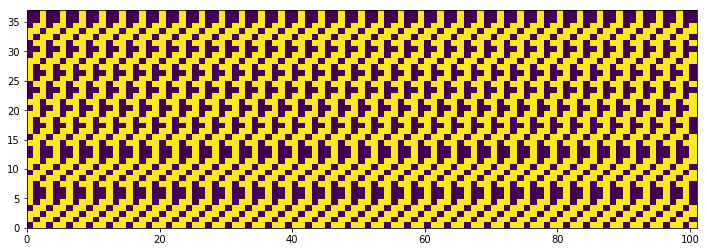

In [684]:
ck = cks[20]
print ck
ini = np.reshape(mids[ck],(1,-1,1))
out = sample(env,ini=ini)
print np.shape(out)
showsptime(out.squeeze().T)
plt.show()

In [400]:
def markov(tmat):    
    if not np.all(np.sum(tmat,axis=1)==1):
        print "[WARN] transition matrix is not normalised"
#         tmat = 

tmat = adj/np.sum(adj,axis=1,keepdims=1)
markov(tmat)    



# def tile()
# ?np.tile

[WARN] transition matrix is not normalised


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


In [394]:
print mids[idx].squeeze()

[[0 0 0 0 0]
 [0 1 1 0 1]
 [1 0 1 1 0]
 [1 0 0 1 1]
 [1 1 0 1 1]]


In [355]:
n = 5
lst = [base2bin(str(x),10,n) for x in range(2**n)]
res[2]

[array([[[0],
         [0],
         [0],
         [1],
         [0]]]),
 array([], shape=(0, 7, 1), dtype=int64),
 array([], shape=(0, 9, 1), dtype=int64),
 array([], shape=(0, 11, 1), dtype=int64)]

In [299]:
out = np.array(outlst[2])
print out.shape

(12, 9, 1)


In [306]:
env.alias

'118'

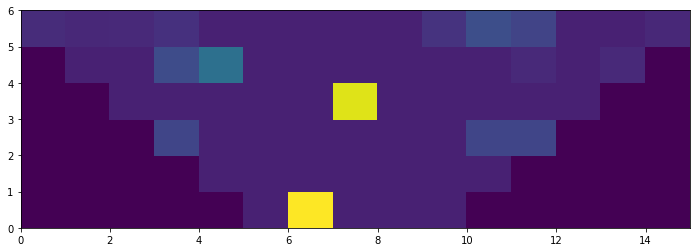

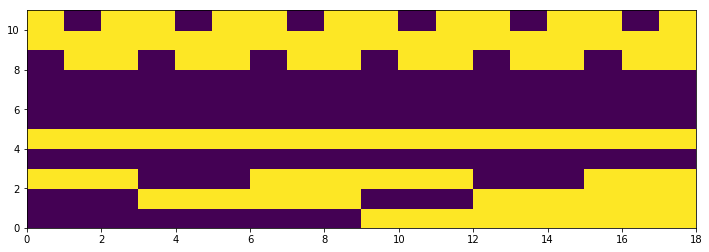

In [330]:
# showsptime(np.array(outlst[2]))
outlst =main('01000',per=0)
out = np.array(outlst[3])
showsptime(np.squeeze(out).T)
plt.show()

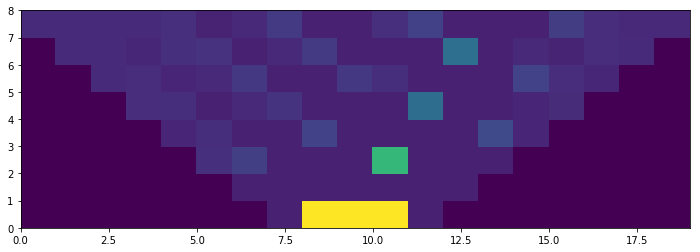

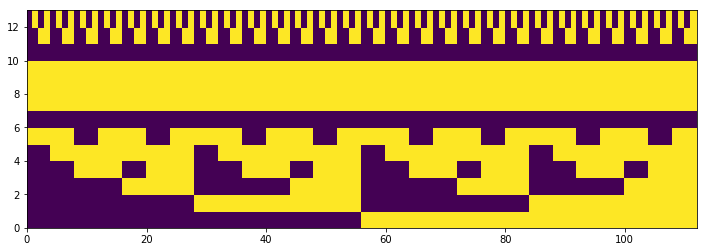

In [320]:
# showsptime(np.array(outlst[2]))
outlst =main('01110',per=2)
out = np.array(outlst[4])
showsptime(np.squeeze(out).T)
plt.show()

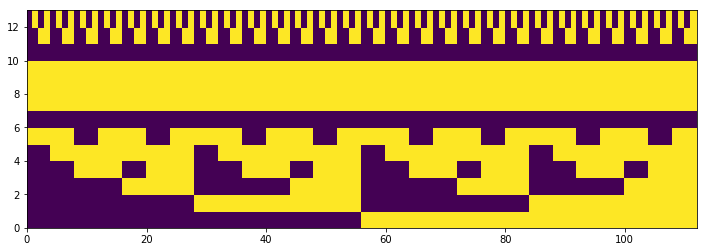

In [316]:
out = np.array(outlst[4])
showsptime(np.squeeze(out).T)
plt.show()

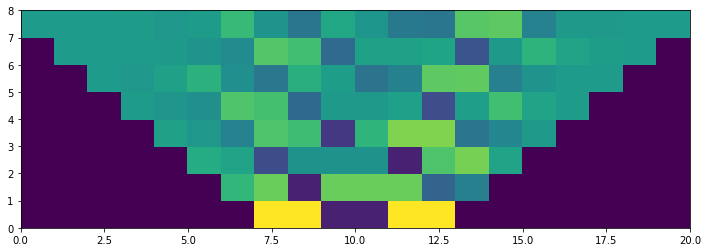

In [243]:
showsptime(out.T)
plt.show()

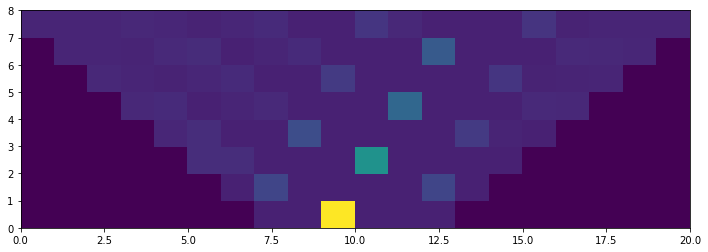

In [246]:
showsptime(out.T)
plt.show()

In [234]:
bin(51)

'0b110011'

In [224]:
int(glider[::-1],2)

99

In [208]:
ini_int.ravel()
# [ini.size//2]

array([60, 57, 51, 39, 15, 30])

In [226]:
# ini.size
# ini_int[2]
ini_int.flat[(ini.size-1)//2]

99

In [229]:
fir = np.reshape(2**np.arange(ini.size),(1,-1,1))
ini_int = convolve_int(ini,fir,'reflect').flat[(ini.size-1)//2]
recur = convolve_int(parent[paridx.ravel()],fir,'wrap') == ini_int


0.00569155446756426

In [184]:
parent.shape

(262144, 18, 1)

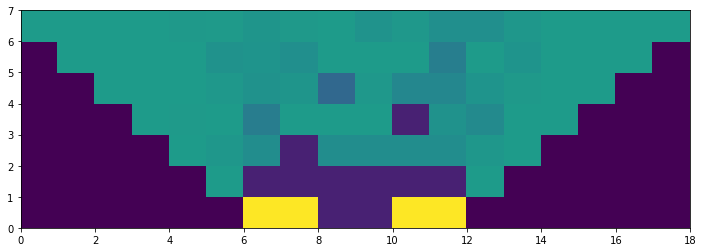

In [175]:
ini.shape

(1, 4, 1)

In [96]:
# import functools
# functools.partial(env.adv,method='valid')

In [5]:
??CA_sys